# Završni rad - Otkrivanje znanja u podacima

1.	Razumijevanje problema


2.	Priprema podataka


3.	Istraživačka analiza podataka


4.	Oblikovanje baznog modela, balansiranje podataka, particija podataka (treniranje i testiranje)
- filtriramo cjelokupni dataframe na [titleType=movie]
- svodimo cjelokupni dataframe na [naslov_filma, režiser, žanrovi, prosječna_ocjena]

5.	Primjena različitih postupaka strojnog učenja


6.	Odabir najboljeg modela, evaluacija (u odnosu na bazni model, model treba biti osjetljiv na cijenu pogreške)


7.	Primjena u stvarnim uvjetima

In [151]:
import os
import pandas as pd
import matplotlib.pyplot as plt

import settings


TITLES_DTYPE = {
    'startYear'         : 'string',
    'titleType'         : 'string',
    'primaryTitle'      : 'string',
    'directorName'      : 'string',
    'genres'            : 'object',
    'averageRating'     : 'float',
    'numVotes'          : 'int',
    'runtimeMinutes'    : 'int',
}

rename_map = {
    'averageRating'     : 'Prosječna ocjena',
    'numVotes'          : 'Broj glasova',
    'numVotes_n'        : 'Broj glasova (n*)',
    'titleType'         : 'Tip naslova',
    'primaryTitle'      : 'Naziv naslova',
    'startYear'         : 'Godina',
    'runtimeMinutes'    : 'Trajanje (min)',
    'runtimeMinutes_n'  : 'Trajanje (min) (n*)',
    'genres'            : 'Žanr',
}

titles_df = pd.read_csv(os.path.join(settings.DATASET_DIR, 'master.csv'), dtype=TITLES_DTYPE)
titles_df['genres'] = titles_df['genres'].apply(eval)

titles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457439 entries, 0 to 457438
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   startYear       457387 non-null  string 
 1   titleType       457439 non-null  string 
 2   primaryTitle    457439 non-null  string 
 3   directorName    457439 non-null  string 
 4   genres          457439 non-null  object 
 5   averageRating   457439 non-null  float64
 6   numVotes        457439 non-null  int32  
 7   runtimeMinutes  457439 non-null  int32  
dtypes: float64(1), int32(2), object(1), string(4)
memory usage: 24.4+ MB


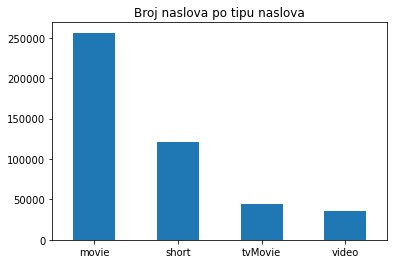

In [152]:
titles_df.titleType.value_counts() \
    .plot.bar(title='Broj naslova po tipu naslova', rot=0)
plt.show()

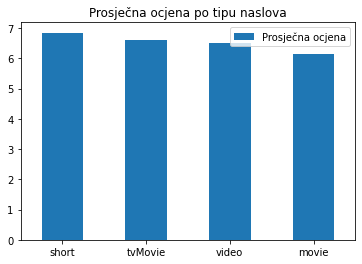

In [153]:
titles_df[['titleType', 'averageRating']]\
    .groupby('titleType').mean('averageRating') \
    .sort_values('averageRating', ascending=False).rename(columns=rename_map) \
    .plot.bar(title="Prosječna ocjena po tipu naslova", rot=0)
plt.xlabel(None)
plt.show()

<AxesSubplot:ylabel='startYear'>

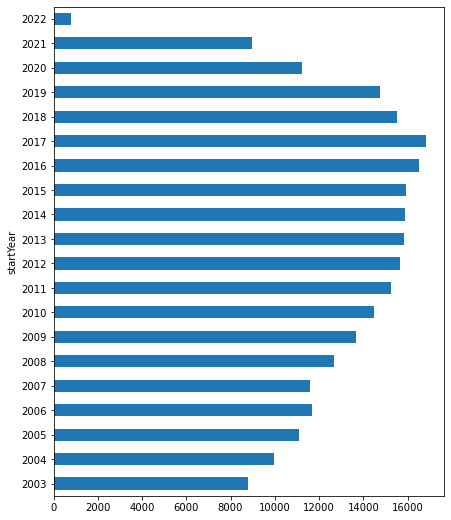

In [176]:
titles_df.groupby('startYear').size() \
    .sort_index(ascending=False).head(20)[::-1] \
    .plot.barh(figsize=(7, 9))

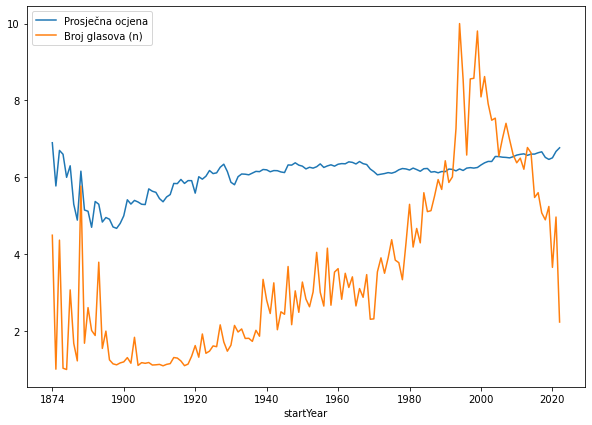

In [180]:
from sklearn.preprocessing import MinMaxScaler

normalizer = MinMaxScaler((1, 10))

yearly_ratings_df = titles_df.groupby('startYear').mean()
yearly_ratings_df['numVotes_n'] = normalizer.fit_transform(yearly_ratings_df[['numVotes']])
yearly_ratings_df[['averageRating', 'numVotes_n']].rename(columns=rename_map)\
    .plot(figsize=(10, 7))
plt.show()

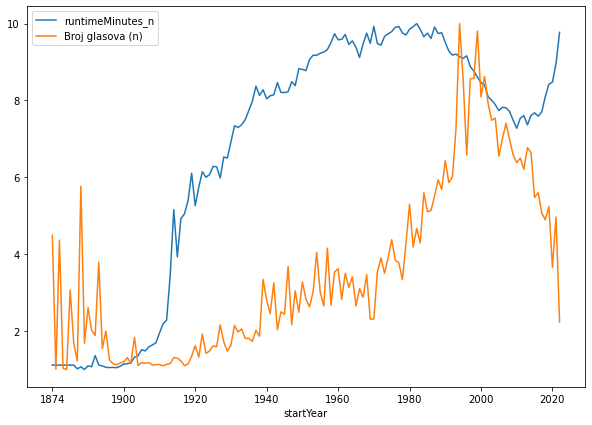

In [181]:
yearly_ratings_df['runtimeMinutes_n'] = normalizer.fit_transform(yearly_ratings_df[['runtimeMinutes']])
yearly_ratings_df[['runtimeMinutes_n', 'numVotes_n']].rename(columns=rename_map)\
    .plot(figsize=(10, 7))
plt.show()

In [183]:
titles_df[titles_df['titleType'] == 'movie'] \
    .sort_values(['numVotes', 'averageRating'], ascending=False).head(20)

,startYear,titleType,primaryTitle,directorName,genres,averageRating,numVotes,runtimeMinutes
72387,1994,movie,The Shawshank Redemption,Frank Darabont,[Drama],9.3,2547412,142
194303,2008,movie,The Dark Knight,Christopher Nolan,"[Action, Crime, Drama]",9.0,2497809,152
267063,2010,movie,Inception,Christopher Nolan,"[Action, Adventure, Sci-Fi]",8.8,2237262,148
85870,1999,movie,Fight Club,David Fincher,[Drama],8.8,2005358,139
71406,1994,movie,Forrest Gump,Robert Zemeckis,"[Drama, Romance]",8.8,1965749,142
72187,1994,movie,Pulp Fiction,Quentin Tarantino,"[Crime, Drama]",8.9,1959207,154
84068,1999,movie,The Matrix,Lana Wachowski,"[Action, Sci-Fi]",8.7,1837591,136
78668,2001,movie,The Lord of the Rings: The Fellowship of the Ring,Peter Jackson,"[Action, Adventure, Drama]",8.8,1777729,178
98302,2003,movie,The Lord of the Rings: The Return of the King,Peter Jackson,"[Action, Adventure, Drama]",8.9,1755900,201
42427,1972,movie,The Godfather,Francis Ford Coppola,"[Crime, Drama]",9.2,1752303,175


In [184]:
titles_df = titles_df[titles_df['titleType'] == 'movie']
# titles_df = titles_df.drop(['startYear', 'titleType'], axis=1)
titles_df.sample(10)

,startYear,titleType,primaryTitle,directorName,genres,averageRating,numVotes,runtimeMinutes
209358,2008,movie,Placebo,Keith Feighan,"[Comedy, Drama]",8.5,31,0
143369,1995,movie,Spadikam,Bhadran,"[Action, Drama]",8.6,5576,150
347854,2013,movie,Rangeelay,Navaniat Singh,"[Action, Comedy, Drama]",5.0,190,129
313251,2000,movie,Artifact,Michael Ray Fox,[Fantasy],7.6,10,63
158238,2002,movie,Baby Alone,Jong-o Hong,"[Comedy, Drama, Romance]",4.9,29,107
241967,2020,movie,Stolen Lilies,Greg Galloway,[Drama],4.3,9,85
57887,1986,movie,Tantsploshchadka,Samson Samsonov,[Romance],5.5,30,86
108867,1949,movie,Majka Katina,Nikola Popovic,[Drama],3.3,8,91
323928,2012,movie,A Story of Yonosuke,Shûichi Okita,[Drama],7.5,1917,160
349827,2017,movie,Bald Knobber,Michael Johnson,"[Drama, History, Western]",4.8,22,177


Pretpostavka: Što je veći broj uzoraka, opada njihova kvaliteta (prosječna ocjena)

In [185]:
genres_df = titles_df[['genres', 'averageRating']].explode('genres')
genres_df.genres.value_counts()

Drama          115743
Comedy          63104
Documentary     37026
Romance         29149
Action          26502
Crime           22232
Thriller        21162
Horror          17909
Adventure       16277
Family          10173
Mystery          9786
Biography        7748
Fantasy          7648
History          7166
Sci-Fi           6059
Music            6042
Musical          5933
War              5656
Western          4855
Animation        4396
Adult            3656
Sport            3033
Film-Noir         745
News              592
Reality-TV         32
Short              19
Talk-Show           3
Game-Show           1
Name: genres, dtype: int64

In [186]:
selected_genres = [
    'Drama','Short','Comedy', 'Documentary',
    'Romance', 'Action', 'Horror', 'Crime', 
    'Thriller', 'Animation', 'Adventure', 
    'Family', 'Adult', 'Fantasy', 'Mystery',
    'Sci-Fi', 'Music', 'Biography', 'History',
    'Musical', 'War', 'Western', 'Sport',
    # 'News',
    # 'Film-Noir',
    # 'Reality-TV',
    # 'Talk-Show',
    # 'Game-Show',
]

genres_df[genres_df['genres'].isin(selected_genres)].genres.value_counts()

Drama          115743
Comedy          63104
Documentary     37026
Romance         29149
Action          26502
Crime           22232
Thriller        21162
Horror          17909
Adventure       16277
Family          10173
Mystery          9786
Biography        7748
Fantasy          7648
History          7166
Sci-Fi           6059
Music            6042
Musical          5933
War              5656
Western          4855
Animation        4396
Adult            3656
Sport            3033
Short              19
Name: genres, dtype: int64

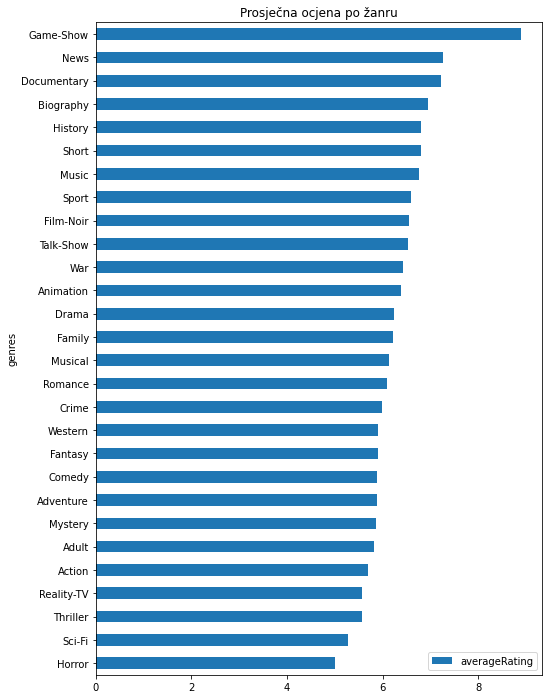

In [187]:
genres_df.groupby('genres').mean('averageRating') \
    .sort_values('averageRating') \
    .plot.barh(title='Prosječna ocjena po žanru', figsize=(8, 12))
plt.show()

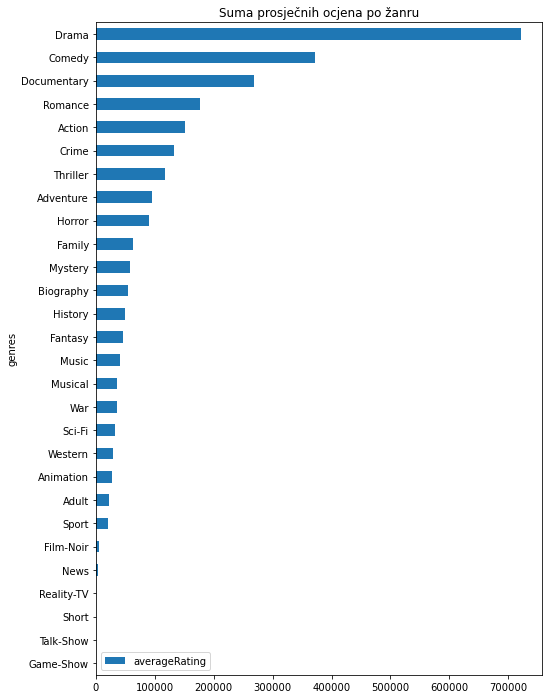

In [188]:
genres_df.groupby('genres').sum('averageRating') \
    .sort_values('averageRating') \
    .plot.barh(title='Suma prosječnih ocjena po žanru', figsize=(8, 12))
plt.show()